# A. EFFECT OF THE NUMBER OF TRAINING SAMPLES ON PERFORMANCE
In this experiment, we will evaluate the effect of proposed few-shot learning method to address the first two challenges in limited data fault diagnosis: 1) industry systems are not allowed to run into faulty states due to the consequences, especially for critical systems and failures; 2) most electromechanical failures occur slowly and follow a degradation path such that failure degradation of a system might take months or even years. We conducted a series of experiments on the training data in datasets D with 90, 120, 300, 900, 1500, 3000, 6000, 12000, 19800 samples respectively, then evaluated the effect of numbers on performance for each training model. We repeated each experiment ten times to deal with the randomness of the algorithms.

# B. PERFORMANCE UNDER NOISE ENVIRONMENT
In this experient, we will evaluate effect of the proposed few-shot learning method to address the third challenge in limited data fault diagnosis: 
working conditions of mechanical systems are very complicated and change many times from time to time according to production requirement. It is unrealistic to collect and label enough training samples. 
We discuss the performance under noise environment to simulate the change of working conditions in datasets D.
Signal-to-noise ratio (SNR) is defined as the ratio of signal power to the noise power, often expressed in decibels detailed as follows:
\begin{equation}\label{eq:SNR}
    \small
    \operatorname{SNR_{dB}} = 10\operatorname{log}_{10}(P_{signal}/P_{noise}) 
\end{equation}
where $P_{signal}$ and $P_{noise}$ are the power of the signal and the noise, respectively.
In this case, the models are trained with the original data provided by CWRU, then tested with added different SNR white Gaussian test samples. The different SNR ranges from -4 dB to 10 dB. 


In [1]:
%matplotlib inline
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
# set the memory usage
tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True
set_session(tf.Session(config=tf_config))

import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import imp
import pandas as pd


Using TensorFlow backend.


# load data

In [2]:
import cwru 

window_size = 2048
data = cwru.CWRU(['12DriveEndFault'], ['1772', '1750', '1730'], window_size)
data.nclasses,data.classes,len(data.X_train),len(data.X_test)

Datasets/CWRU 12DriveEndFault 1730
0 Datasets/CWRU/NormalBaseline/1730/Normal.mat
(485643, 2)
1 Datasets/CWRU/NormalBaseline/1750/Normal.mat
dict_keys(['ans', 'X098_FE_time', '__globals__', 'X099_FE_time', '__version__', 'X099_DE_time', 'X098_DE_time', '__header__'])
(483903, 2)
2 Datasets/CWRU/NormalBaseline/1772/Normal.mat
(483903, 2)
3 Datasets/CWRU/12DriveEndFault/1730/0.007-Ball.mat
(121556, 2)
4 Datasets/CWRU/12DriveEndFault/1750/0.007-Ball.mat
(121556, 2)
5 Datasets/CWRU/12DriveEndFault/1772/0.007-Ball.mat
(121410, 2)
6 Datasets/CWRU/12DriveEndFault/1730/0.014-Ball.mat
(122136, 2)
7 Datasets/CWRU/12DriveEndFault/1750/0.014-Ball.mat
(121991, 2)
8 Datasets/CWRU/12DriveEndFault/1772/0.014-Ball.mat
(122136, 2)
9 Datasets/CWRU/12DriveEndFault/1730/0.021-Ball.mat
(122136, 2)
10 Datasets/CWRU/12DriveEndFault/1750/0.021-Ball.mat
(122136, 2)
11 Datasets/CWRU/12DriveEndFault/1772/0.021-Ball.mat
(121701, 2)
12 Datasets/CWRU/12DriveEndFault/1730/0.007-InnerRace.mat
(122917, 2)
13 Datasets/C

(10,
 [('NormalBaselineNormal', 0),
  ('12DriveEndFault0.007-Ball', 1),
  ('12DriveEndFault0.014-Ball', 2),
  ('12DriveEndFault0.021-Ball', 3),
  ('12DriveEndFault0.007-InnerRace', 4),
  ('12DriveEndFault0.014-InnerRace', 5),
  ('12DriveEndFault0.021-InnerRace', 6),
  ('12DriveEndFault0.007-OuterRace6', 7),
  ('12DriveEndFault0.014-OuterRace6', 8),
  ('12DriveEndFault0.021-OuterRace6', 9)],
 19800,
 750)

### Load models

In [3]:
import models
# imp.reload(models)
siamese_net = models.load_siamese_net((window_size,2))
print('\nsiamese_net summary:')
siamese_net.summary()


siamese_net summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2048, 2)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048, 2)      0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 100)          51796       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 100)          0           sequential_1[1][0]    

In [4]:
print('\nsequential_3 is WDCNN:')
siamese_net.layers[2].summary()


sequential_3 is WDCNN:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 128, 16)           2064      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 64, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 64, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 32, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 16, 64)         

In [5]:
wdcnn_net = models.load_wdcnn_net()
print('\nwdcnn_net summary:')
wdcnn_net.summary()

52806

wdcnn_net summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2048, 2)           0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 100)               51796     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 52,806
Trainable params: 52,806
Non-trainable params: 0
_________________________________________________________________


## Config

In [6]:
import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping

import siamese
imp.reload(siamese)
import utils
imp.reload(utils)

snrs = [-4,-2,0,2,4,6,8,10,None]


settings = {
  "N_way": 10,           # how many classes for testing one-shot tasks>
  "batch_size": 32,
  "best": -1,
  "evaluate_every": 200,   # interval for evaluating on one-shot tasks
  "loss_every": 20,      # interval for printing loss (iterations)
  "n_iter": 15000,
  "n_val": 2,          #how many one-shot tasks to validate on?
  "n": 0,
  "save_path":"",
  "save_weights_file": "weights-best-10-oneshot-low-data.hdf5"
}

exp_name = "EXP-AB"
# exps = [60,90,120,200,300,600,900,1500,3000,6000,12000,19800]
exps = [60,90,120,200,300,600,900,1500,6000,19800]
# exps = [60,90,120]
times = 20


### Training & Testing

In [ ]:
is_training = False   # enable or disable train models. if enable training, save best models will be update.

def EXPAB_train_and_test(exp_name,exps,is_training):
    train_classes = sorted(list(set(data.y_train)))
    train_indices = [np.where(data.y_train == i)[0] for i in train_classes]
    for exp in exps:
        scores_1_shot = []
        scores_5_shot = []
        scores_5_shot_prod = []
        scores_wdcnn = []
        num = int(exp/len(train_classes))
        settings['evaluate_every'] = 300 if exp<1000 else 600
        print(settings['evaluate_every'])
        for time_idx in range(times):
            seed = int(time_idx/4)*10
            np.random.seed(seed)
            print('random seed:',seed)
            print("\n%s-%s"%(exp,time_idx) + '*'*80)
            settings["save_path"] = "tmp/%s/size_%s/time_%s/" % (exp_name,exp,time_idx)
            data._mkdir(settings["save_path"])

            train_idxs = []
            val_idxs = []
            for i, c in enumerate(train_classes):
                select_idx = train_indices[i][np.random.choice(len(train_indices[i]), num, replace=False)]
                split = int(0.6*num)
                train_idxs.extend(select_idx[:split])
                val_idxs.extend(select_idx[split:])
            X_train, y_train = data.X_train[train_idxs],data.y_train[train_idxs], 
            X_val, y_val = data.X_train[val_idxs],data.y_train[val_idxs], 
            
            print(train_idxs[0:10])
            print(val_idxs[0:10])

            # load one-shot model and training
            siamese_net = models.load_siamese_net()
            siamese_loader = siamese.Siamese_Loader(X_train,
                                            y_train,
                                            X_val,
                                            y_val)

            if(is_training):
                print(siamese.train_and_test_oneshot(settings,siamese_net,siamese_loader))

                
            # load wdcnn model and training
            y_train = keras.utils.to_categorical(y_train, data.nclasses)
            y_val = keras.utils.to_categorical(y_val, data.nclasses)
            y_test = keras.utils.to_categorical(data.y_test, data.nclasses)

            earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')
            # checkpoint
            # filepath="tmp/weights-best-cnn-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="%sweights-best-10-cnn-low-data.hdf5" % (settings["save_path"])
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
            callbacks_list = [earlyStopping,checkpoint]

            wdcnn_net = models.load_wdcnn_net()
            if(is_training):
                    wdcnn_net.fit(X_train, y_train,
                              batch_size=32,
                              epochs=300,
                              verbose=0,
                              callbacks=callbacks_list,
                              validation_data=(X_val, y_val))
                    
            # loading best weights and testing
            print("load best weights",settings["save_path"] + settings['save_weights_file'])
            siamese_net.load_weights(settings["save_path"] + settings['save_weights_file'])
            print("load best weights",filepath)
            wdcnn_net.load_weights(filepath)
            for snr in snrs:
                print("\n%s_%s_%s"%(exp,time_idx,snr) + '*'*80)
                X_test_noise = []
                if snr != None:
                    for x in data.X_test:
                        X_test_noise.append(utils.noise_rw(x,snr))
                    X_test_noise = np.array(X_test_noise)
                else:
                    X_test_noise = data.X_test
                
                
                # test 1_shot and 5_shot
                siamese_loader.set_val(X_test_noise,data.y_test)
                s = 'val'
                preds_5_shot = []
                prods_5_shot = []
                scores = []
                for k in range(5):
                    val_acc,preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes[s]),
                                                                 len(siamese_loader.data[s]),verbose=False)
    #                 utils.confusion_plot(preds[:,1],preds[:,0])
                    print(val_acc,preds.shape, prods.shape)
                    scores.append(val_acc)
                    preds_5_shot.append(preds[:,1])
                    prods_5_shot.append(prods)
                preds = []
                for line in np.array(preds_5_shot).T:
                    pass
                    preds.append(np.argmax(np.bincount(line)))
    #             utils.confusion_plot(np.array(preds),data.y_test) 
                prod_preds = np.argmax(np.sum(prods_5_shot,axis=0),axis=1).reshape(-1)

                score_5_shot = accuracy_score(data.y_test,np.array(preds))*100
                print('5_shot:',score_5_shot)
                
                score_5_shot_prod = accuracy_score(data.y_test,prod_preds)*100
                print('5_shot_prod:',score_5_shot_prod)
                
                scores_1_shot.append(scores[0])
                scores_5_shot.append(score_5_shot)
                scores_5_shot_prod.append(score_5_shot_prod)

                # test wdcnn
                score = wdcnn_net.evaluate(X_test_noise, y_test, verbose=0)[1]*100
                print('wdcnn:', score)
                scores_wdcnn.append(score)


        a =pd.DataFrame(np.array(scores_1_shot).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_1_shot.csv" % (exp_name,exp),index=True)

        a =pd.DataFrame(np.array(scores_5_shot).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_5_shot.csv" % (exp_name,exp),index=True)
        
        a =pd.DataFrame(np.array(scores_5_shot_prod).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_5_shot_prod.csv" % (exp_name,exp),index=True)

        a =pd.DataFrame(np.array(scores_wdcnn).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_wdcnn.csv" % (exp_name,exp),index=True)   

        
EXPAB_train_and_test(exp_name,exps,is_training)

In [7]:
np.bincount([2,2,3,3,1])

array([0, 1, 2, 2])

## Analysis

In [8]:
def EXPAB_analysis(exp_name,exps):
    scores_1_shot_all = pd.DataFrame()
    scores_5_shot_all = pd.DataFrame()
    scores_5_shot_prod_all = pd.DataFrame()
    scores_wdcnn_all = pd.DataFrame()
    for exp in exps:
        file_path = "tmp/%s/size_%s" % (exp_name,exp)
        tmp_data = pd.read_csv("%s/scores_1_shot.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_1_shot_all = pd.concat([scores_1_shot_all,tmp_data],axis=0)

        tmp_data = pd.read_csv("%s/scores_5_shot.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_5_shot_all = pd.concat([scores_5_shot_all,tmp_data],axis=0)

        tmp_data = pd.read_csv("%s/scores_5_shot_prod.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_5_shot_prod_all = pd.concat([scores_5_shot_prod_all,tmp_data],axis=0)
        
        tmp_data = pd.read_csv("%s/scores_wdcnn.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_wdcnn_all = pd.concat([scores_wdcnn_all,tmp_data],axis=0)


    scores_1_shot_all.to_csv("tmp/%s/scores_1_shot_all.csv" % (exp_name), float_format='%.6f', index=True)
    scores_5_shot_all.to_csv("tmp/%s/scores_5_shot_all.csv" % (exp_name), float_format='%.6f', index=True)
    scores_5_shot_prod_all.to_csv("tmp/%s/scores_5_shot_prob_all.csv" % (exp_name), float_format='%.6f', index=True)
    scores_wdcnn_all.to_csv("tmp/%s/scores_wdcnn_all.csv" % (exp_name), float_format='%.6f', index=True)

    scores_1_shot_all['model'] = 'One-shot'
    scores_5_shot_all['model'] = 'Five-shot'
    scores_5_shot_prod_all['model'] = 'Five-shot-prob'
    scores_wdcnn_all['model'] = 'WDCNN'

    scores_all = pd.concat([scores_1_shot_all,scores_5_shot_all,scores_5_shot_prod_all,scores_wdcnn_all],axis=0)
    scores_all.to_csv("tmp/%s/scores_all.csv" % (exp_name), float_format='%.6f', index=True)   
    
    return scores_all

In [9]:
# analysis
scores_all = EXPAB_analysis(exp_name,exps)
scores_all_mean = scores_all.groupby(['model','exp']).mean()
scores_all_std = scores_all.groupby(['model','exp']).std()
scores_all_mean.to_csv("tmp/%s/scores_all_mean.csv" % (exp_name), float_format='%.2f', index=True)
scores_all_std.to_csv("tmp/%s/scores_all_std.csv" % (exp_name), float_format='%.2f', index=True)
scores_all_mean, scores_all_std

(                             -4         -2          0          2          4  \
 model          exp                                                            
 Five-shot      60     31.013333  46.673333  62.073333  72.013333  76.653333   
                90     33.500000  49.560000  66.213333  79.266667  85.720000   
                120    30.613333  47.966667  66.780000  80.906667  87.546667   
                200    29.746667  45.166667  61.026667  76.320000  85.413333   
                300    29.326667  44.160000  61.940000  77.793333  86.580000   
                600    28.713333  45.540000  65.393333  80.273333  88.526667   
                900    38.466667  53.826667  72.593333  87.386667  94.200000   
                1500   34.886667  49.146667  66.120000  82.013333  92.513333   
                6000   37.726667  55.146667  69.853333  83.713333  94.613333   
                19800  41.320000  57.600000  71.486667  85.913333  95.180000   
 Five-shot-prob 60     31.826667  47.640

In [10]:
scores_all.shape

(800, 11)

## 90 t-SNE and confusion matrix results

In [11]:
from sklearn.metrics import accuracy_score
import keras

num = 90
train_classes = sorted(list(set(data.y_train)))
train_indices = [np.where(data.y_train == i)[0] for i in train_classes]

train_idxs = []
val_idxs = []
for i, c in enumerate(train_classes):
    select_idx = train_indices[i][np.random.choice(len(train_indices[i]), num, replace=False)]
    split = int(0.6*num)
    train_idxs.extend(select_idx[:split])
    val_idxs.extend(select_idx[split:])
X_train, y_train = data.X_train[train_idxs],data.y_train[train_idxs] 
X_val, y_val = data.X_train[val_idxs],data.y_train[val_idxs] 


siamese_loader = siamese.Siamese_Loader(X_train,
                                y_train,
                                data.X_test,
                                data.y_test)

siamese_net = models.load_siamese_net()
wdcnn_net = models.load_wdcnn_net()
 

settings["save_path"] = "tmp/%s/size_%s/time_%s/" % (exp_name,num,0)
siamese_net.load_weights(settings["save_path"] + settings['save_weights_file'])
wdcnn_net.load_weights("%s/weights-best-10-cnn-low-data.hdf5" % (settings["save_path"]))


y_test = keras.utils.to_categorical(data.y_test, data.nclasses)  

{'train': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'val': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
540 750
[54, 54, 54, 54, 54, 54, 54, 54, 54, 54] [75, 75, 75, 75, 75, 75, 75, 75, 75, 75]
52806


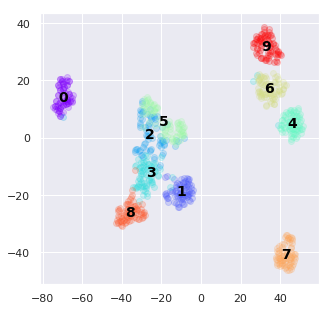

In [11]:
from keras import backend as K
import numpy as np
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')

intermediate_tensor_function = K.function([siamese_net.layers[2].layers[0].input],
                                          [siamese_net.layers[2].layers[-1].output])

plot_only = len(data.y_test)
intermediate_tensor = intermediate_tensor_function([data.X_test[0:plot_only]])[0]
# Visualization of trained flatten layer (T-SNE)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(intermediate_tensor)
p_data = pd.DataFrame(columns=['x', 'y', 'label'])
p_data.x = low_dim_embs[:, 0]
p_data.y = low_dim_embs[:, 1]
p_data.label = data.y_test[0:plot_only]
utils.plot_with_labels(p_data)
plt.savefig("%s/90-tsne-one-shot.pdf" % (settings["save_path"]))

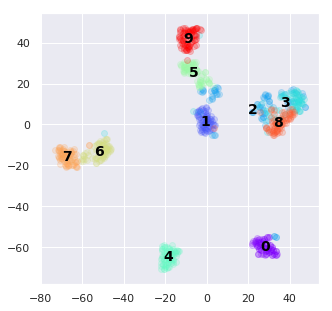

In [12]:
from keras import backend as K
import numpy as np

intermediate_tensor_function = K.function([wdcnn_net.layers[1].layers[0].input],
                                          [wdcnn_net.layers[1].layers[-1].output])
plot_only = len(data.y_test)
intermediate_tensor = intermediate_tensor_function([data.X_test[0:plot_only]])[0]
# Visualization of trained flatten layer (T-SNE)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(intermediate_tensor)
import pandas as pd
p_data = pd.DataFrame(columns=['x', 'y', 'label'])
p_data.x = low_dim_embs[:, 0]
p_data.y = low_dim_embs[:, 1]
p_data.label = data.y_test[0:plot_only]
utils.plot_with_labels(p_data)
plt.savefig("%s/90-tsne-wdcnn.pdf" % (settings["save_path"]))

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


Confusion matrix, without normalization
[[75  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  3  0  0  0  0  0  0]
 [ 4  1 40 10  0 20  0  0  0  0]
 [ 0  4  2 62  0  1  2  0  4  0]
 [ 0  0  0  0 74  0  1  0  0  0]
 [ 0  1 21  0  0 53  0  0  0  0]
 [ 0  0  0  0  3  0 70  0  0  2]
 [ 0  0  0  0  0  0  0 75  0  0]
 [ 0  0  0  2  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0  0  0 75]]


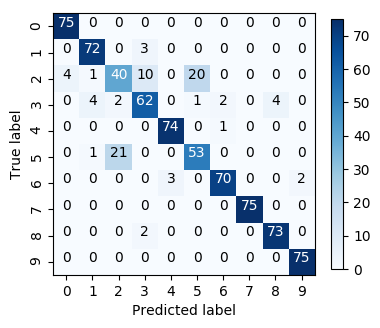

In [13]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
s = 'val'
val_acc,preds = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes[s]),len(siamese_loader.data[s]),verbose=False)
# utils.confusion_plot(preds[:,1],preds[:,0])
utils.plot_confusion_matrix(confusion_matrix(data.y_test,preds[:,1]),  normalize=False,  title=None)
plt.savefig("%s/90-cm-one-shot.pdf" % (settings["save_path"]))

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


Confusion matrix, without normalization
[[75  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 4  8 20 25  0  1  0  0 17  0]
 [ 1  2  1 54  0  0  0  0 16  1]
 [ 0  0  0  0 75  0  0  0  0  0]
 [ 0  3  8  0  0 62  0  0  0  2]
 [ 0  0  0  0  3  0 61 11  0  0]
 [ 0  0  0  0  0  0  1 74  0  0]
 [ 0  1  1  4  0  0  0  0 69  0]
 [ 0  0  1  0  0 31  1  0  0 42]]


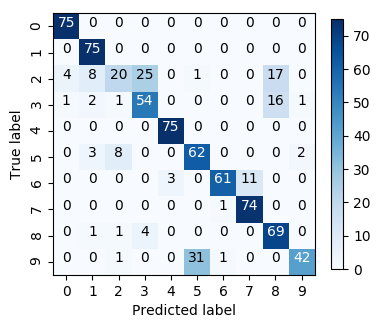

In [14]:
pred = np.argmax(wdcnn_net.predict(data.X_test), axis=1).reshape(-1,1)
# utils.confusion_plot(pred,data.y_test)
utils.plot_confusion_matrix(confusion_matrix(data.y_test,pred),  normalize=False,title=None)
plt.savefig("%s/90-cm-wdcnn.pdf" % (settings["save_path"]))